In [6]:
import api
import pandas as pd
# Get a dataframe (df) using get_merged_dataframe from api.py 
# 14L to select Manchester CCG and 5.1 to select Antibacterial group
df = api.get_merged_dataframe('14L', '5.1')
df['items_per_patient'] = df['items'] / df['total_list_size']


In [8]:
def get_min_max_practice_from_dataframe(df):
    """Find the practices with the minimum and maximum mean items_per_patient from a dataframe retrieved from 
    get_merged_dataframe

    Arguments:
        df {pandas.DataFrame} -- A pandas dataframe retrieved using get_merged_dataframe

    Returns:
        dict -- A dictionary containing the practice with the highest and lowest mean value
    """ 
    # Initialise an empty dictionary to hold the mean value for each practice
    means={}
    # loop over unique practice names in the dataframe
    for practice in df['row_name'].unique():
        # Make a new dataframe for each practice
        practice_df = df[df.row_name == practice]
        # Find the mean items per patient
        average = practice_df["items_per_patient"].mean()
        # add it to the dictionary
        means[practice] = average 
    
    # Find the minimum and maximum mean practices
    minimum = min(means, key=means.get)
    maximum = max(means, key=means.get)

    # Put it in the output dictionary
    output = {
        "minimum": minimum,
        "maximum": maximum
    }

    # Return the output dictionary
    return output
    
# Run the function on the dataframe retrieved in the previous step
means = get_min_max_practice_from_dataframe(df)

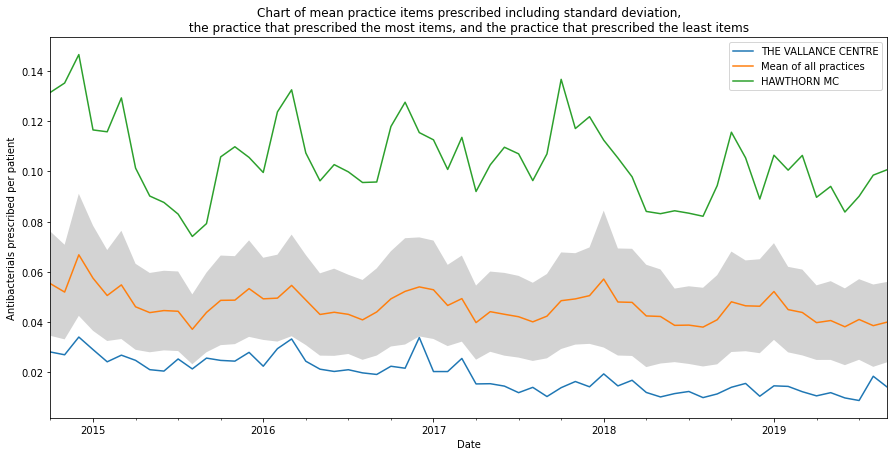

In [76]:
def plot_min_max_mean(df):
    """Plot the dataframe retrieved using the get_merged_dataframe function

    Arguments:
        df {pandas.DataFrame} -- A pandas dataframe retrieved using get_merged_dataframe

    Returns:
        matplotlib plot -- A matplotlib plot containing the minimum and maximum practices in a ccg, the mean and the mean 
    """ 
    minmax = get_min_max_practice_from_dataframe(df)
    mean = df['items_per_patient'].groupby(df['date']).mean()
    stdev = df['items_per_patient'].groupby(df['date']).std()
    mean = pd.DataFrame({'date': mean.index, 'items_per_patient': mean.values})
    mean['date'] = pd.to_datetime(mean['date'])
    minimum = df[df.row_name == minmax['minimum']]
    maximum = df[df.row_name == minmax['maximum']]
    df = pd.DataFrame()
    df['date'] = mean['date']
    df['min'] = minimum['items_per_patient'].values
    df['mean'] = mean['items_per_patient'].values
    df['std_low'] = mean['items_per_patient'].values - stdev.values
    df['std_high'] = mean['items_per_patient'].values + stdev.values
    df['max'] = maximum['items_per_patient'].values
    plot = df.plot(x = 'date', y=['min', 'mean', 'max'], figsize=(15,7))
    plot.fill_between(df['date'].values, df['std_low'].values, df['std_high'].values, facecolor='lightgray')
    plot.set_title('Chart of mean practice items prescribed including standard deviation,\n the practice that prescribed the most items, and the practice that prescribed the least items ')
    plot.set_xlabel('Date')
    plot.set_ylabel('Antibacterials prescribed per patient')
    plot.legend(labels = (minmax['minimum'], "Mean of all practices", minmax["maximum"]))
    return plot 
    
plot = plot_min_max_mean(df)

